<a href="https://colab.research.google.com/github/lucasoliveira13/Digital_Image_Processing/blob/main/Processamento_de_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Processamento de Imagens

Grupo:
*   Lucas Matheus da Silva Oliveira
*   Guilherme Cavalcanti Vilarim



##Inicializando o dataset

In [ ]:
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import os
from collections import Counter

drive.mount('/content/drive')
dataset = '/content/drive/MyDrive/PDI'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Resize

In [ ]:
def resize(image, original_size,path):
    image = np.asarray(image)
    width, height, channels = image.shape
    new_x = original_size[1]
    new_y = original_size[0]
    scale_x = new_x / (width-1)
    scale_y = new_y / (height-1)
    #solucionar problema de 0..1 do rgb
    normalized_image = image / 255.0

    resized_image = np.zeros([new_x, new_y, channels])
    for row in range(new_x-1):
        for column in range(new_y-1):
          resized_image[row,column] = normalized_image[int(row / scale_x), int(column / scale_y)]
    img.imsave(path, resized_image)

##Converter para preto e branco

In [ ]:
def grey_scale(image,path):
  width, height = image.size
  array_image = np.asarray(image)
  new_image = np.zeros([width, height, array_image.shape[2]])
  for x in range(width):
    for y in range(height):
      pixel_value = array_image[y, x]
      lm = 0.3 * pixel_value[0] + 0.59 * pixel_value[1] + 0.11 * pixel_value[2]
      new_image[y,x] = (lm,lm,lm)
  new_image /= 255.0
  img.imsave(path, new_image)


##Redimensionando a imagem

In [ ]:
#LEITURA E REDIMENSIONAMENTO DA IMAGEM
data_original = []
data_resized = []
expected_shapes = [(512,512),(640,640),(384,384),(96,96),(128,128),(192,192)]

file_list = os.listdir(dataset)
i=0

for file_name in file_list:
    file_path = os.path.join(dataset, file_name)
    if os.path.isfile(file_path):
      print('Imagem->',file_name)
      image = Image.open(file_path)
      data_original.append(image)
      final_path = f'/content/drive/MyDrive/PDI/new_images/resized_{file_name}'
      resize(image,expected_shapes[i],final_path)
      data_resized.append(Image.open(final_path))
      print('Salvando a imagem em->',final_path)
      i+=1


Imagem-> RdmImgA_1.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/new_images/resized_RdmImgA_1.jpg
Imagem-> RdmImgA_2.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/new_images/resized_RdmImgA_2.jpg
Imagem-> RdmImgA_3.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/new_images/resized_RdmImgA_3.jpg
Imagem-> RdmImgD_1.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/new_images/resized_RdmImgD_1.jpg
Imagem-> RdmImgD_2.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/new_images/resized_RdmImgD_2.jpg
Imagem-> RdmImgD_3.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/new_images/resized_RdmImgD_3.jpg


##Mudando a escala

In [ ]:
#LEITURA E MUDANÇA DE ESCALA
data_pb = []
resized_images = '/content/drive/MyDrive/PDI/new_images'
file_list = os.listdir(resized_images)
for file_name in file_list:
    file_path = os.path.join(resized_images, file_name)
    if os.path.isfile(file_path):
      print('Imagem->',file_name)
      image = Image.open(file_path)
      final_path = f'/content/drive/MyDrive/PDI/new_images/black_and_white/greyscale_{file_name}'
      grey_scale(image,final_path)
      data_pb.append(Image.open(final_path))
      print('Salvando a imagem em->',final_path)
      i+=1

Imagem-> resized_RdmImgA_1.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/new_images/black_and_white/greyscale_resized_RdmImgA_1.jpg
Imagem-> resized_RdmImgA_2.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/new_images/black_and_white/greyscale_resized_RdmImgA_2.jpg
Imagem-> resized_RdmImgA_3.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/new_images/black_and_white/greyscale_resized_RdmImgA_3.jpg
Imagem-> resized_RdmImgD_2.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/new_images/black_and_white/greyscale_resized_RdmImgD_2.jpg
Imagem-> resized_RdmImgD_3.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/new_images/black_and_white/greyscale_resized_RdmImgD_3.jpg
Imagem-> resized_RdmImgD_1.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/new_images/black_and_white/greyscale_resized_RdmImgD_1.jpg


##Equalização de Histogramas

In [ ]:
def instantiate_histogram():
    hist_array= []

    for i in range(0,256):
        hist_array.append(str(i))
        hist_array.append(0)

    hist_dct = {hist_array[i]: hist_array[i + 1] for i in range(0, len(hist_array), 2)}

    return hist_dct

def intensity_histogram(array_image,width,height):
    #calculando histograma
    occurrences = instantiate_histogram()
    for x in range(width):
      for y in range(height):
        occurrences[str(array_image[x,y])] += 1
    return occurrences

def probabilities_histogram(histogram,n):
    hist_prob = {}
    for i in range(len(histogram)):
      hist_prob[str(i)] = histogram[str(i)] / n
    return hist_prob

def accumulated_probability(probabilities_histogram):
    sum_prob = 0
    accumulated = {}
    for i in range(len(probabilities_histogram)):
      if i != 0:
        sum_prob += accumulated[str(i-1)]
      else:
        pass
      accumulated[str(i)] = probabilities_histogram[str(i)] + sum_prob
    return accumulated

def maping(accumulated_probability):
    new_map = {}
    #percorre cada valor de pixel
    for i in range(0,256):
        new_map[str(i)] = np.ceil(accumulated_probability[str(i)]*255)
    return new_map

def equalize(image,path):
    array_image = np.asarray(image)
    width,height = array_image.shape
    histogram = intensity_histogram(array_image,width,height)
    probabilities = probabilities_histogram(histogram,array_image.size)
    accumulated = accumulated_probability(probabilities)
    map = maping(accumulated)
    for x in range(width):
      for y in range(height):
        array_image[x,y] = map[str(array_image[x,y])]
    img.imsave(path,array_image)
    return array_image


def plot_hist(hist, hist2=''):
    if hist2 != '':
        figure, axarr = plt.subplots(1,2, figsize=(20, 10))
        axarr[0].bar(hist.keys(), hist.values())
        axarr[1].bar(hist2.keys(), hist2.values())
    else:
        plt.bar(hist.keys(), hist.values())
        plt.xlabel("Intensity levels")
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        plt.grid(True)
        plt.show()

##Gamma

In [ ]:
import cv2

def adjust_gamma(image, gamma=1.0):
    adjusted_value = 1.0 / gamma
    table = np.array([((i / 255.0) ** adjusted_value) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    #aplica as alterações na imagem
    return cv2.LUT(image, table)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


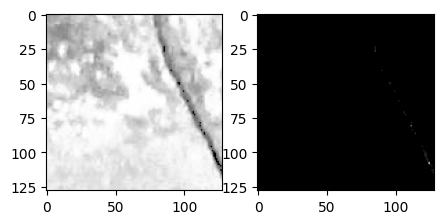

In [ ]:
image = Image.open('/content/drive/MyDrive/PDI/atividade_2/Escurecer_0.jpg')
path_destino = '/content/drive/MyDrive/PDI/atividade_2/resultados/Escurecer_0_result.jpg'
image_test = Image.open('/content/drive/MyDrive/PDI/atividade_2/resultados/Clarear_0_result.jpg')
array_image = np.asarray(image_test)
equalized_image = equalize(image,path_destino)
print(equalized_image)
equalized_gamma = adjust_gamma(array_image)
figure, axarr = plt.subplots(1,2, figsize=(5, 5))
axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(Image.fromarray(equalized_image), cmap='gray')

##Plotando as imagens e Histogramas (Alterando tamanhos e escala de cinza)


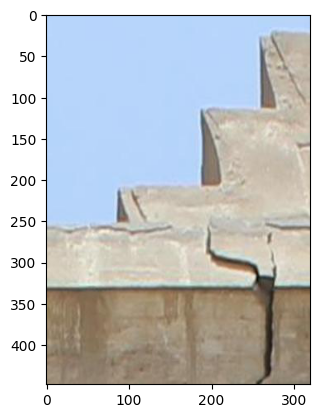

In [ ]:
plt.imshow(data_original[0])

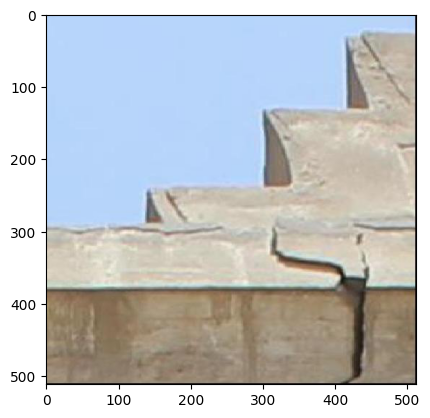

In [ ]:
plt.imshow(data_resized[0])

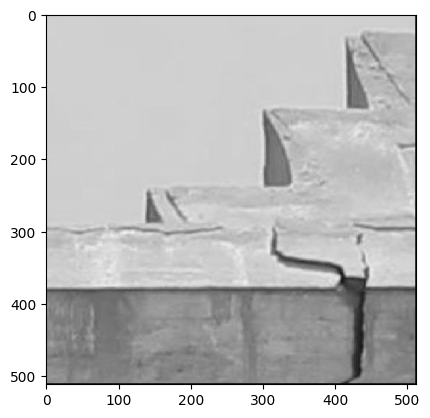

In [ ]:
plt.imshow(data_pb[0])

(array([8.70000e+02, 6.90000e+02, 6.06000e+02, 5.37000e+02, 2.01000e+02,
        8.10000e+01, 3.30000e+01, 1.50000e+01, 3.00000e+00, 6.00000e+00,
        9.00000e+00, 1.20000e+01, 3.00000e+00, 0.00000e+00, 0.00000e+00,
        6.00000e+00, 3.00000e+00, 3.00000e+00, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 9.00000e+00, 9.00000e+00, 1.80000e+01, 3.30000e+01,
        1.80000e+01, 5.10000e+01, 3.60000e+01, 3.90000e+01, 4.20000e+01,
        4.80000e+01, 4.20000e+01, 5.70000e+01, 1.02000e+02, 9.60000e+01,
        1.11000e+02, 1.35000e+02, 1.44000e+02, 1.77000e+02, 1.95000e+02,
        1.53000e+02, 1.44000e+02, 1.83000e+02, 1.11000e+02, 9.60000e+01,
        1.26000e+02, 1.29000e+02, 1.23000e+02, 1.53000e+02, 1.65000e+02,
        1.53000e+02, 1.23000e+02, 1.56000e+02, 1.50000e+02, 1.59000e+02,
        1.08000e+02, 1.26000e+02, 1.17000e+02, 1.14000e+02, 1.02000e+02,
        1.59000e+02, 1.83000e+02, 1.98000e+02, 2.43000e+02, 1.86000e+02,
        1.89000e+02, 2.04000e+02, 2.64000e+02, 2.40

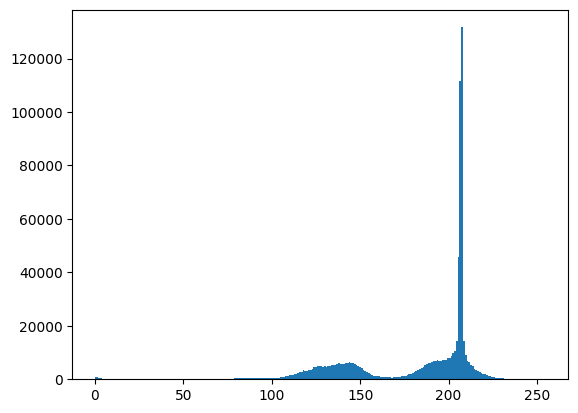

In [ ]:
plt.hist(np.asarray(data_pb[0]).ravel(), bins=256, range=(0,255))

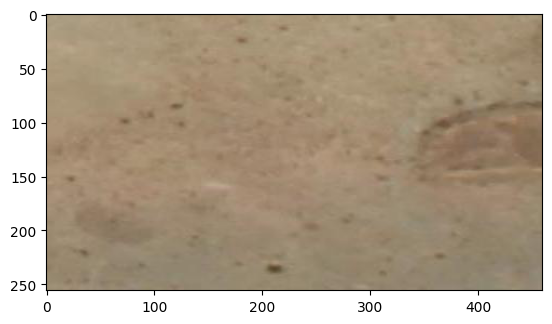

In [ ]:
plt.imshow(data_original[1])

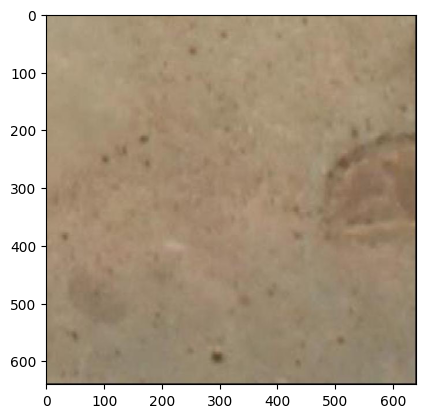

In [ ]:
plt.imshow(data_resized[1])

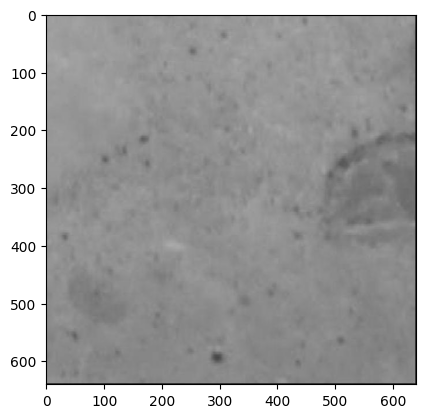

In [ ]:
plt.imshow(data_pb[1])

(array([6.0900e+02, 9.2100e+02, 1.1430e+03, 6.7200e+02, 2.6400e+02,
        1.4700e+02, 3.9000e+01, 1.2000e+01, 9.0000e+00, 6.0000e+00,
        3.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        6.0000e+00, 9.0000e+00, 6.0000e+00, 9.00

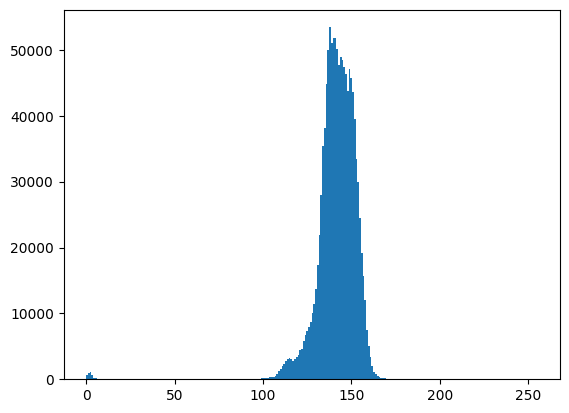

In [ ]:
plt.hist (np.asarray(data_pb[1]).ravel(), bins=256, range=(0,255))

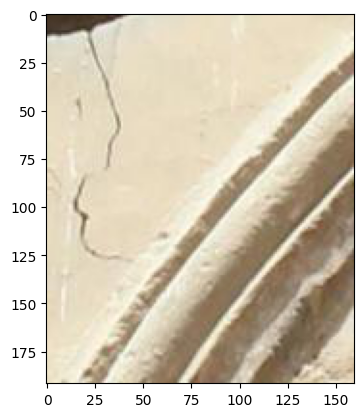

In [ ]:
plt.imshow(data_original[2])

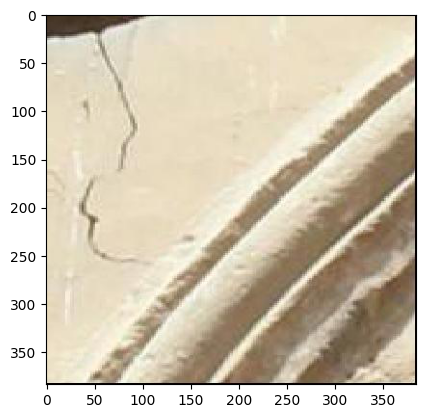

In [ ]:
plt.imshow(data_resized[2])

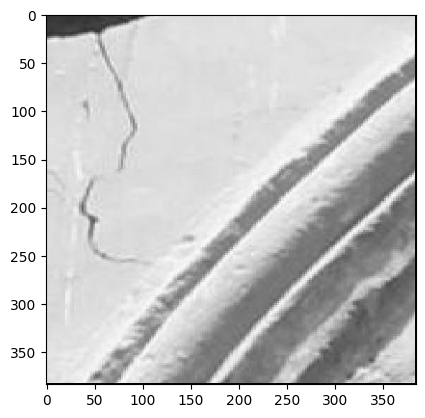

In [ ]:
plt.imshow(data_pb[2])

(array([5.0400e+02, 2.7300e+02, 4.1100e+02, 3.8100e+02, 2.6700e+02,
        1.7400e+02, 9.6000e+01, 4.8000e+01, 4.5000e+01, 1.2000e+01,
        1.5000e+01, 9.0000e+00, 1.2000e+01, 1.2000e+01, 1.2000e+01,
        3.0000e+00, 3.0000e+00, 3.0000e+00, 6.0000e+00, 0.0000e+00,
        3.0000e+00, 6.0000e+00, 6.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 3.0000e+00,
        3.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 9.0000e+00, 3.0000e+01, 1.5000e+01, 2.7000e+01,
        3.6000e+01, 8.1000e+01, 2.2200e+02, 2.3100e+02, 1.7700e+02,
        2.8200e+02, 2.9100e+02, 4.2000e+02, 2.9700e+02, 3.0900e+02,
        3.3000e+02, 2.4000e+02, 2.2800e+02, 2.4300e+02, 1.7400e+02,
        1.4700e+02, 1.2600e+02, 1.2900e+02, 1.2000e+02, 1.2600e+02,
        7.5000e+01, 6.9000e+01, 3.6000e+01, 6.30

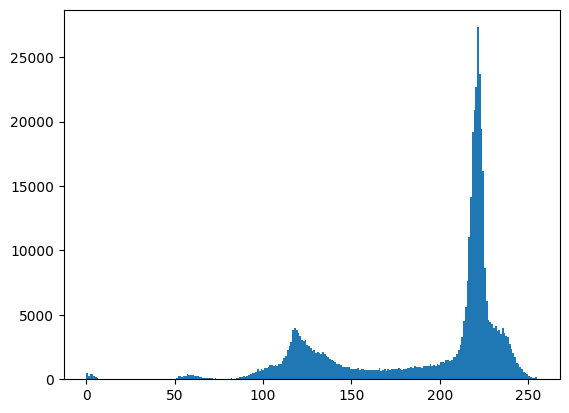

In [ ]:
plt.hist (np.asarray(data_pb[2]).ravel(), bins=256, range=(0,255))

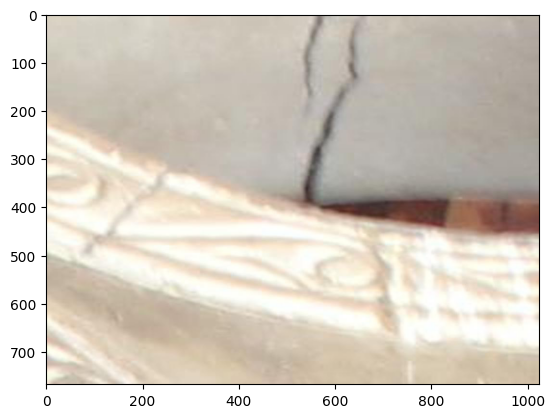

In [ ]:
plt.imshow(data_original[3])

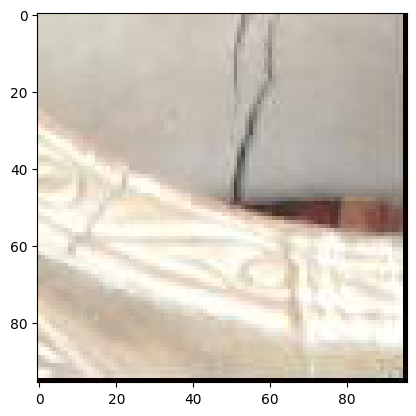

In [ ]:
plt.imshow(data_resized[3])

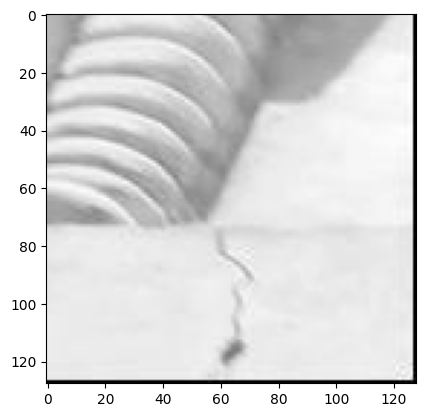

In [ ]:
plt.imshow(data_pb[3])

(array([5.0400e+02, 2.7300e+02, 4.1100e+02, 3.8100e+02, 2.6700e+02,
        1.7400e+02, 9.6000e+01, 4.8000e+01, 4.5000e+01, 1.2000e+01,
        1.5000e+01, 9.0000e+00, 1.2000e+01, 1.2000e+01, 1.2000e+01,
        3.0000e+00, 3.0000e+00, 3.0000e+00, 6.0000e+00, 0.0000e+00,
        3.0000e+00, 6.0000e+00, 6.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 3.0000e+00,
        3.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 9.0000e+00, 3.0000e+01, 1.5000e+01, 2.7000e+01,
        3.6000e+01, 8.1000e+01, 2.2200e+02, 2.3100e+02, 1.7700e+02,
        2.8200e+02, 2.9100e+02, 4.2000e+02, 2.9700e+02, 3.0900e+02,
        3.3000e+02, 2.4000e+02, 2.2800e+02, 2.4300e+02, 1.7400e+02,
        1.4700e+02, 1.2600e+02, 1.2900e+02, 1.2000e+02, 1.2600e+02,
        7.5000e+01, 6.9000e+01, 3.6000e+01, 6.30

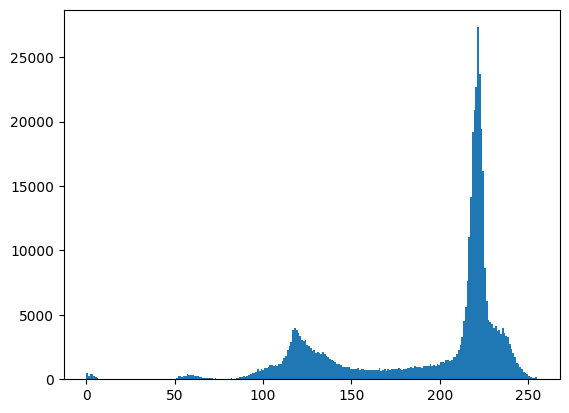

In [ ]:
plt.hist (np.asarray(data_pb[2]).ravel(), bins=256, range=(0,255))

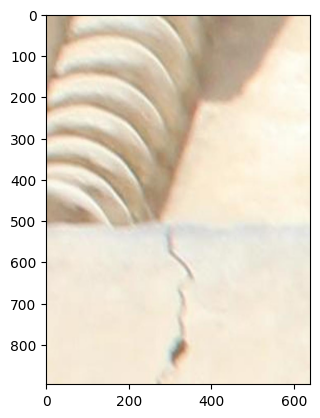

In [ ]:
plt.imshow(data_original[4])

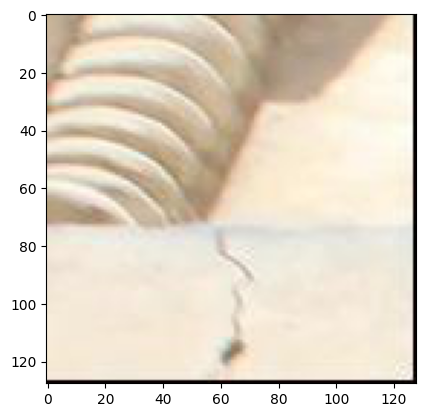

In [ ]:
plt.imshow(data_resized[4])

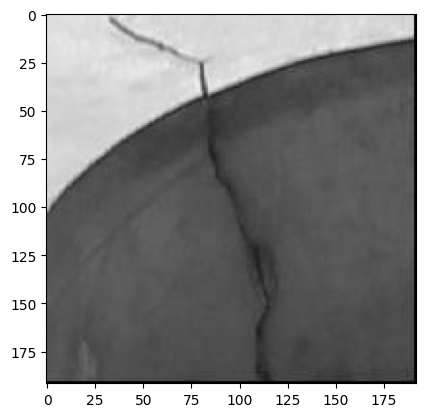

In [ ]:
plt.imshow(data_pb[4])

(array([1.860e+02, 1.860e+02, 2.520e+02, 2.340e+02, 1.380e+02, 8.100e+01,
        3.900e+01, 1.800e+01, 3.000e+00, 3.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 6.000e+00, 1.500e+01, 1.800e+01, 1.200e+01, 3.300e+01,
        2.700e+01, 3.000e+01, 2.100e+01, 4.800e+01, 6.000e+01, 3.900e+01,
        3.600e+01, 5.100e+01, 1.050e+02, 7.200e+01, 1.140e+02, 1.260e+02,
        1.530e+02, 1.200e+02, 2.010e+02, 1.200e+02, 1.920e+02, 2.040e+02,
        2.190e+02, 2.160e+02, 2.220e+02, 2.430e+02, 2.670e+02, 2.280e+02,
        3.000e+02, 3.870e+02, 4.200e+02, 5.520e+02, 6.120e+02, 7.440e+02,
        7.530e+02, 9.330e+02, 1.107e+03, 1.326e+03, 1.212e+03, 1.425e+03,
        1.581e+03, 1.653e+03, 1.974e+03, 2.157e+03, 2.613e+03, 2.880e+03,
        2.994e+03, 3.063e+03, 3.408e+0

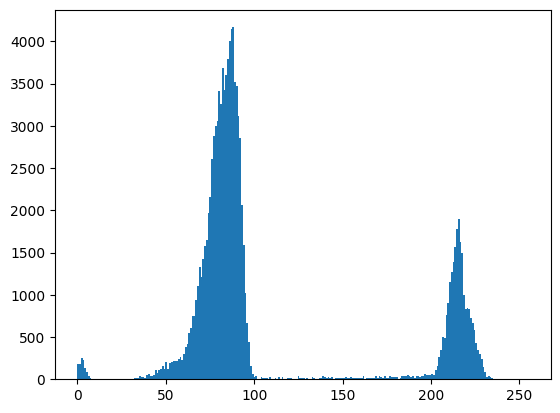

In [ ]:
plt.hist (np.asarray(data_pb[4]).ravel(), bins=256, range=(0,255))

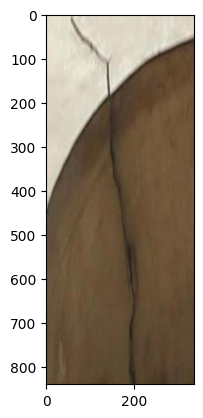

In [ ]:
plt.imshow(data_original[5])

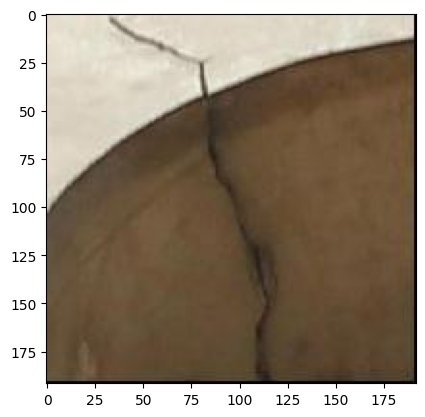

In [ ]:
plt.imshow(data_resized[5])

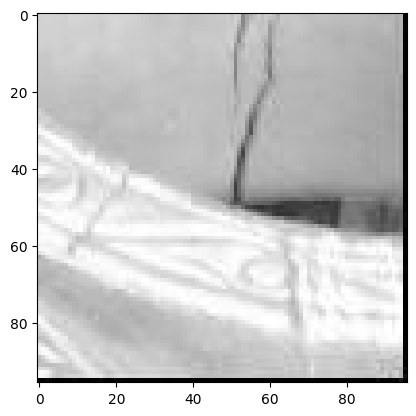

In [ ]:
plt.imshow(data_pb[5])

(array([174., 111., 111.,  57.,  36.,  30.,   9.,  24.,   3.,   3.,   0.,
          3.,   0.,   3.,   0.,   0.,   3.,   0.,   3.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  12.,   6.,   6.,   3.,   0.,   3.,
          6.,   6.,   9.,   9.,  12.,   6.,  33.,  18.,  18.,   6.,  18.,
         15.,  15.,  15.,   9.,   9.,   9.,   6.,  24.,   6.,   6.,   9.,
         15.,   3.,   3.,   3.,   6.,   9.,  12.,  12.,   9.,   9.,   9.,
         12.,   3.,  12.,  12.,  12.,  18.,  12.,  30.,  18.,  21.,  12.,
         21.,   3.,  24.,  24.,  15.,  15.,   6.,  12.,   6.,   9.,  15.,
         18.,  21.,  12.,   6.,  18.,  24.,  21.,  21.,  15.,   9.,  24.,
         12.,  27.,  15.,  18.,  12.,  18.,   6.,   9.,   9.,  27.,  24.,
         27.,  18.,  24.,  24.,  36.,  30.,  30.,  15.,  33.,  27.,  27.,
         24.,  18.,  21.,  12.,  36., 

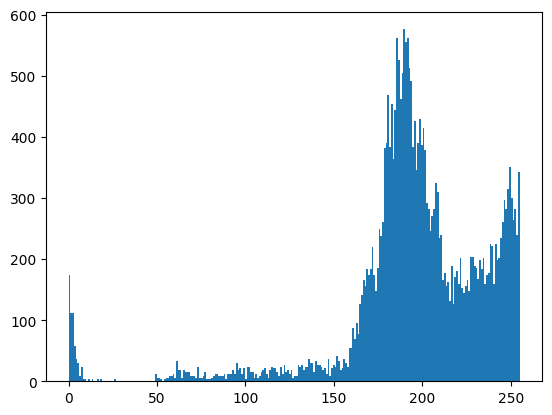

In [ ]:
plt.hist (np.asarray(data_pb[5]).ravel(), bins=256, range=(0,255))